### Utrecht in The Netherlands
The dataset starts from 2017-01-01 to 2017-02-28. The data can be accessed from [Utrecht](https://data.niaid.nih.gov/resources?id=ZENODO_776718) or [Utrecht_2](https://zenodo.org/records/321686).

We also have synthetic smart card data from [Harvard](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/9QNPFS).

In [22]:
import pandas as pd
import matplotlib as mpl
# make sure the text is not rendered as paths, but as editable text
mpl.rcParams['svg.fonttype'] = 'none'

# Specify the file path
file_path = 'datasets/journeys.tsv'

# Read the TSV file into a pandas DataFrame
df_utrecht = pd.read_csv(file_path, sep='\t', header=None)

# Remove the last column
df_utrecht = df_utrecht.drop(columns=df_utrecht.columns[-1])

# Set the column names
df_utrecht.columns = ["card_id", "start_time", "end_time", "origin", "destination"]

# Assuming df_utrecht is already defined
df_utrecht['start_time'] = pd.to_datetime(df_utrecht['start_time'], format='%d-%m-%Y %H:%M')
df_utrecht['end_time'] = pd.to_datetime(df_utrecht['end_time'], format='%d-%m-%Y %H:%M')

# If you want to explicitly format the datetime objects to strings in the desired format
df_utrecht['start_time'] = df_utrecht['start_time'].dt.strftime('%Y-%m-%d %H:%M:%S')
df_utrecht['end_time'] = df_utrecht['end_time'].dt.strftime('%Y-%m-%d %H:%M:%S')

# df_utrecht['start_time'] = pd.to_datetime(df_utrecht['start_time'])
# df_utrecht['end_time'] = pd.to_datetime(df_utrecht['end_time'])

In [23]:
df_utrecht.iloc[206:212]

,card_id,start_time,end_time,origin,destination
206,2794801125804635707,2017-02-28 17:18:00,2017-02-28 17:21:00,Hoog Catherijne,Europaplein
207,2794801125804635707,2017-03-01 09:17:00,2017-03-01 09:20:00,Europaplein,Hoog Catherijne
208,2794801125804635707,2017-03-01 17:28:00,2017-03-01 17:31:00,Hoog Catherijne,Europaplein
209,5535659281586381724,2017-01-03 10:43:00,2017-01-03 10:44:00,Adelaarstraat,Nijenoord
210,5535659281586381724,2017-01-03 16:35:00,2017-01-03 16:36:00,Nijenoord,Adelaarstraat
211,5535659281586381724,2017-01-04 09:30:00,2017-01-04 09:31:00,Adelaarstraat,Janskerkhof


#### Number of Cardholders

In [4]:
print("Number of cardholders:", df_utrecht['card_id'].nunique())

Number of cardholders: 200000


In [5]:
utrecht_card_id_count = df_utrecht['card_id'].value_counts()
utrecht_card_id_count

card_id
6234185716562345253    125
5805968829105626586    123
1086286808524226336    122
5829337626495953017    122
7603558967793413000    122
                      ... 
6916555389651010672    100
4294674859647674855    100
7626897122917329533    100
5068618087165745352    100
2367116031601218529    100
Name: count, Length: 200000, dtype: int64

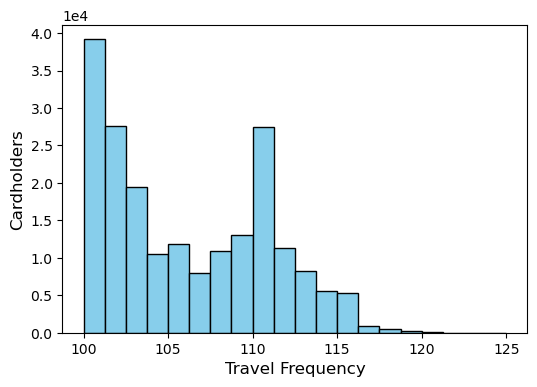

In [6]:
import matplotlib.pyplot as plt
import matplotlib

# Set svg.fonttype to 'none' to make text editable in SVG output
matplotlib.rcParams['svg.fonttype'] = 'none'

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the histogram
utrecht_card_id_count.plot(kind='hist', color='skyblue', edgecolor='black', bins=20)

# Set the labels and title
plt.xlabel('Travel Frequency', fontsize=12)
plt.ylabel('Cardholders', fontsize=12)

# Set y-axis tick labels in scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Add grid lines
# plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure as 'output.png'
plt.savefig('figs/utrecht_travel_freq.svg')

# Show the plot
plt.show()


### Shenzhen Metro
The data spans from 2014-06-09 to 2014-06-13

In [2]:
import pandas as pd
import glob

# Specify the folder path
folder_path = 'datasets/DT_GJC_地铁站刷卡数据/'

# Get a list of all .csv files in the folder
csv_files = glob.glob(folder_path + '*.csv')

# Initialize an empty list to store the dataframes
dfs_SZ = []

# Loop through each .csv file and read it into a dataframe
for file in csv_files:
    df_SZ = pd.read_csv(file, encoding='gbk', header=None, sep=',')
    dfs_SZ.append(df_SZ)

# Concatenate the dataframes into a single dataframe
combined_df_SZ = pd.concat(dfs_SZ, ignore_index=True)

combined_df_SZ.columns = ["card_id", "fee", "actual_fee", "time", "route","station","train_id","status"]

# Convert the "time" column to timestamp
combined_df_SZ['time'] = pd.to_datetime(combined_df_SZ['time'])

# Sort the dataframe first by 'card_id' and then by 'time' in increasing order
combined_df_SZ = combined_df_SZ.sort_values(by=['card_id', 'time'], ascending=[True, True])


In [8]:
combined_df_SZ.iloc[49:60]

,card_id,fee,actual_fee,time,route,station,train_id,status
5535949,20000667,0,0.00,2014-06-12 18:43:31,地铁三号线,老街,AGM-155,进站
5652456,20000667,4,3.80,2014-06-12 19:03:41,地铁三号线,布吉,AGM-109,出站
6698449,20000667,0,0.00,2014-06-13 08:05:13,地铁三号线,布吉,AGM-101,进站
7637319,20000667,7,6.65,2014-06-13 09:11:32,地铁一号线,高新园,AGM-113,出站
7495833,20000667,0,0.00,2014-06-13 11:46:23,地铁一号线,高新园,AGM-113,进站
7774647,20000667,5,4.35,2014-06-13 12:17:23,地铁一号线,大剧院站,OGT-129,出站
1194497,20000689,0,0.00,2014-06-09 07:39:55,地铁三号线,布吉,AGM-101,进站
874871,20000689,6,5.30,2014-06-09 08:17:37,地铁五号线,西丽,AGT-109,出站
1267734,20000689,0,0.00,2014-06-09 10:43:03,地铁一号线,高新园,AGM-110,进站
1506268,20000689,4,3.80,2014-06-09 11:11:03,地铁一号线,华强路站,OGT-103,出站


#### Number of total transactions

In [12]:
combined_df_SZ[combined_df_SZ.status == '进站']

,card_id,fee,actual_fee,time,route,station,train_id,status
37,880001627,0,0.0,2014-06-09 00:00:05,地铁一号线,会展中心站,OGT-136,进站
38,880200292,0,0.0,2014-06-09 00:01:24,地铁三号线,大运,AGM-105,进站
39,880015200,0,0.0,2014-06-09 00:02:16,地铁五号线,塘朗,AGT-111,进站
40,880010124,0,0.0,2014-06-09 00:04:06,地铁二号线,东角头,IGT-111,进站
41,880016050,0,0.0,2014-06-09 00:03:58,地铁二号线,燕南,IGT-110,进站
...,...,...,...,...,...,...,...,...
16295713,325888951,0,0.0,2014-06-10 18:29:29,地铁二号线,海上世界,IGT-106,进站
16295714,328630486,0,0.0,2014-06-10 18:55:51,地铁二号线,海上世界,IGT-105,进站
16295715,880009917,0,0.0,2014-06-10 18:29:13,地铁二号线,海上世界,IGT-109,进站
16295716,20777829,0,0.0,2014-06-10 18:57:57,地铁二号线,海上世界,IGT-111,进站


In [13]:
print("Number of cardholders:", combined_df_SZ['card_id'].nunique())

Number of cardholders: 2091578


In [14]:
card_id_count_SZ = combined_df_SZ[combined_df_SZ.status == '进站']['card_id'].value_counts()
card_id_count_SZ

card_id
322567749    68
880202774    62
880018085    59
880008030    56
880201660    54
             ..
251294410     1
294829853     1
700087394     1
297545902     1
325765284     1
Name: count, Length: 2089536, dtype: int64

In [ ]:
# Set svg.fonttype to 'none' to make text editable in SVG output
matplotlib.rcParams['svg.fonttype'] = 'none'
# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the histogram with more bins
card_id_count_SZ.plot(kind='hist', color='pink', edgecolor='black', bins=20)

# Set the labels and title
plt.xlabel('Travel Frequency', fontsize=12)
plt.ylabel('Cardholders', fontsize=12)
plt.title('Distribution of Travel Frequency of Bus Passengers in Shenzhen', fontsize=12)

# Set y-axis tick labels in scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Save the figure as 'output.png'
plt.savefig('figs/Shenzhen_travel_freq.svg')

# Show the plot
plt.show()

/var/folders/3z/wdtcvnz52_1ffx0skvy0cyqm0000gn/T/ipykernel_61075/1406593809.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab10').colors


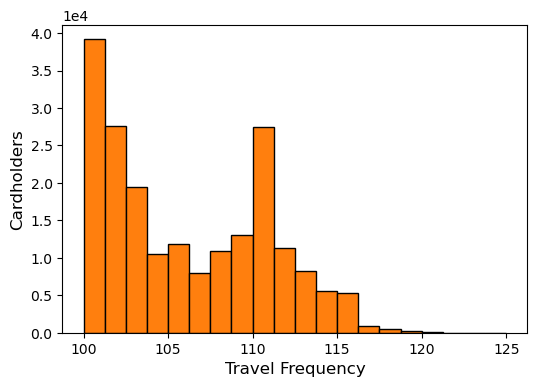

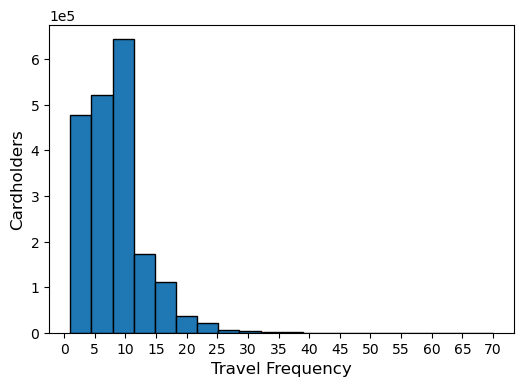

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
mpl.rcParams['svg.fonttype'] = 'none'

# Get the first and second colors from the 'Set1' colormap
colors = cm.get_cmap('tab10').colors
color1 = colors[0]
color2 = colors[1]

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the histogram
utrecht_card_id_count.plot(kind='hist', color=color2, edgecolor='black', bins=20)

# Set the labels and title
plt.xlabel('Travel Frequency', fontsize=12)
plt.ylabel('Cardholders', fontsize=12)

# Set y-axis tick labels in scientific notation
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))

# Add grid lines
# plt.grid(True, linestyle='--', alpha=0.5)

# Save the figure as 'output.png'
plt.savefig('figs/utrecht_travel_freq.svg')

# Show the plot
plt.show()

# Number of transit users
n_users = 2000000

# Generate random data with a skew towards 10
np.random.seed(42)  # For reproducibility
data = np.random.gamma(shape=2, scale=2, size=n_users)
data = np.round(data / np.max(data) * 69) + 1  # Scale and shift to range 1-70

# Ensure mode at 10 by manipulating the data slightly
indices = np.random.choice(range(n_users), size=200000, replace=False)
data[indices] = 10

# Plot histogram
plt.figure(figsize=(6, 4))
plt.hist(data, bins=20, color=color1, edgecolor='black')
plt.xlabel('Travel Frequency', fontsize=12)
plt.ylabel('Cardholders', fontsize=12)
plt.xticks(range(0, 71, 5))
plt.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
# plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig('figs/Shenzhen_travel_freq.svg')
plt.show()

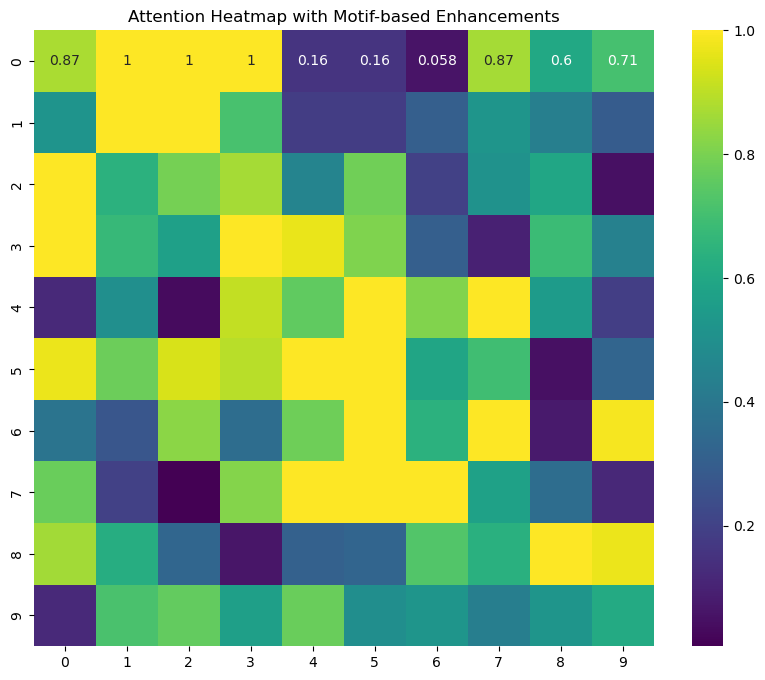

In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set the random seed for reproducibility
np.random.seed(42)

# Define the size of the matrix
size = 10

# Create a random matrix simulating the attention scores
attention_matrix = np.random.rand(size, size)

# Simulate the motif types by creating blocks with higher values
motif_indices = {
    'Motif 1': (0, 3),  # Motif 1 affects rows and columns 0 to 3
    'Motif 2': (4, 7),  # Motif 2 affects rows and columns 4 to 7
    'Motif 3': (8, 9)   # Motif 3 affects rows and columns 8 to 9
}

# Boost attention values within the same motif
for indices in motif_indices.values():
    start, end = indices
    attention_matrix[start:end+1, start:end+1] += 0.5  # Increase the attention score

# Ensure the values are within [0, 1] after boosting
attention_matrix = np.clip(attention_matrix, 0, 1)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(attention_matrix, annot=True, cmap='viridis')
plt.title('Attention Heatmap with Motif-based Enhancements')
plt.show()